In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

## Cleaning

In [140]:
df=pd.read_csv("train.csv")
df=df.drop(columns=["Cabin","Ticket","PassengerId","Name"])
df.sample(5)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
101,0,3,male,NaN,0,0,7.8958,S
553,1,3,male,22.0,0,0,7.2250,C
823,1,3,female,27.0,0,1,12.4750,S
164,0,3,male,1.0,4,1,39.6875,S
74,1,3,male,32.0,0,0,56.4958,S


In [141]:
df[df["Age"]<0]#

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [142]:
df.shape

(891, 8)

In [143]:
df = df.drop_duplicates()
df["Age"].fillna(value=df["Age"].mean(), inplace=True)
df=df.dropna()
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [144]:
df.shape

(778, 8)

In [145]:
df.sample(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
203,0,3,male,45.5,0,0,7.225,C
728,0,2,male,25.0,1,0,26.000,S
875,1,3,female,15.0,0,0,7.225,C


## LabelEncoder

In [146]:
object_data = df.select_dtypes(include="object")
int_data = df.select_dtypes(exclude="object")
enc = LabelEncoder()

# Encode categorical columns using LabelEncoder
for i in range(0, object_data.shape[1]):
    object_data.iloc[:, i] = enc.fit_transform(object_data.iloc[:, i])

# Concatenate numerical and encoded categorical data
df = pd.concat([int_data, object_data], axis=1)

In [147]:
df.sample(3)


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
769,0,3,32.000000,0,0,8.3625,1,2
849,1,1,29.812751,1,0,89.1042,0,0
708,1,1,22.000000,0,0,151.5500,0,2


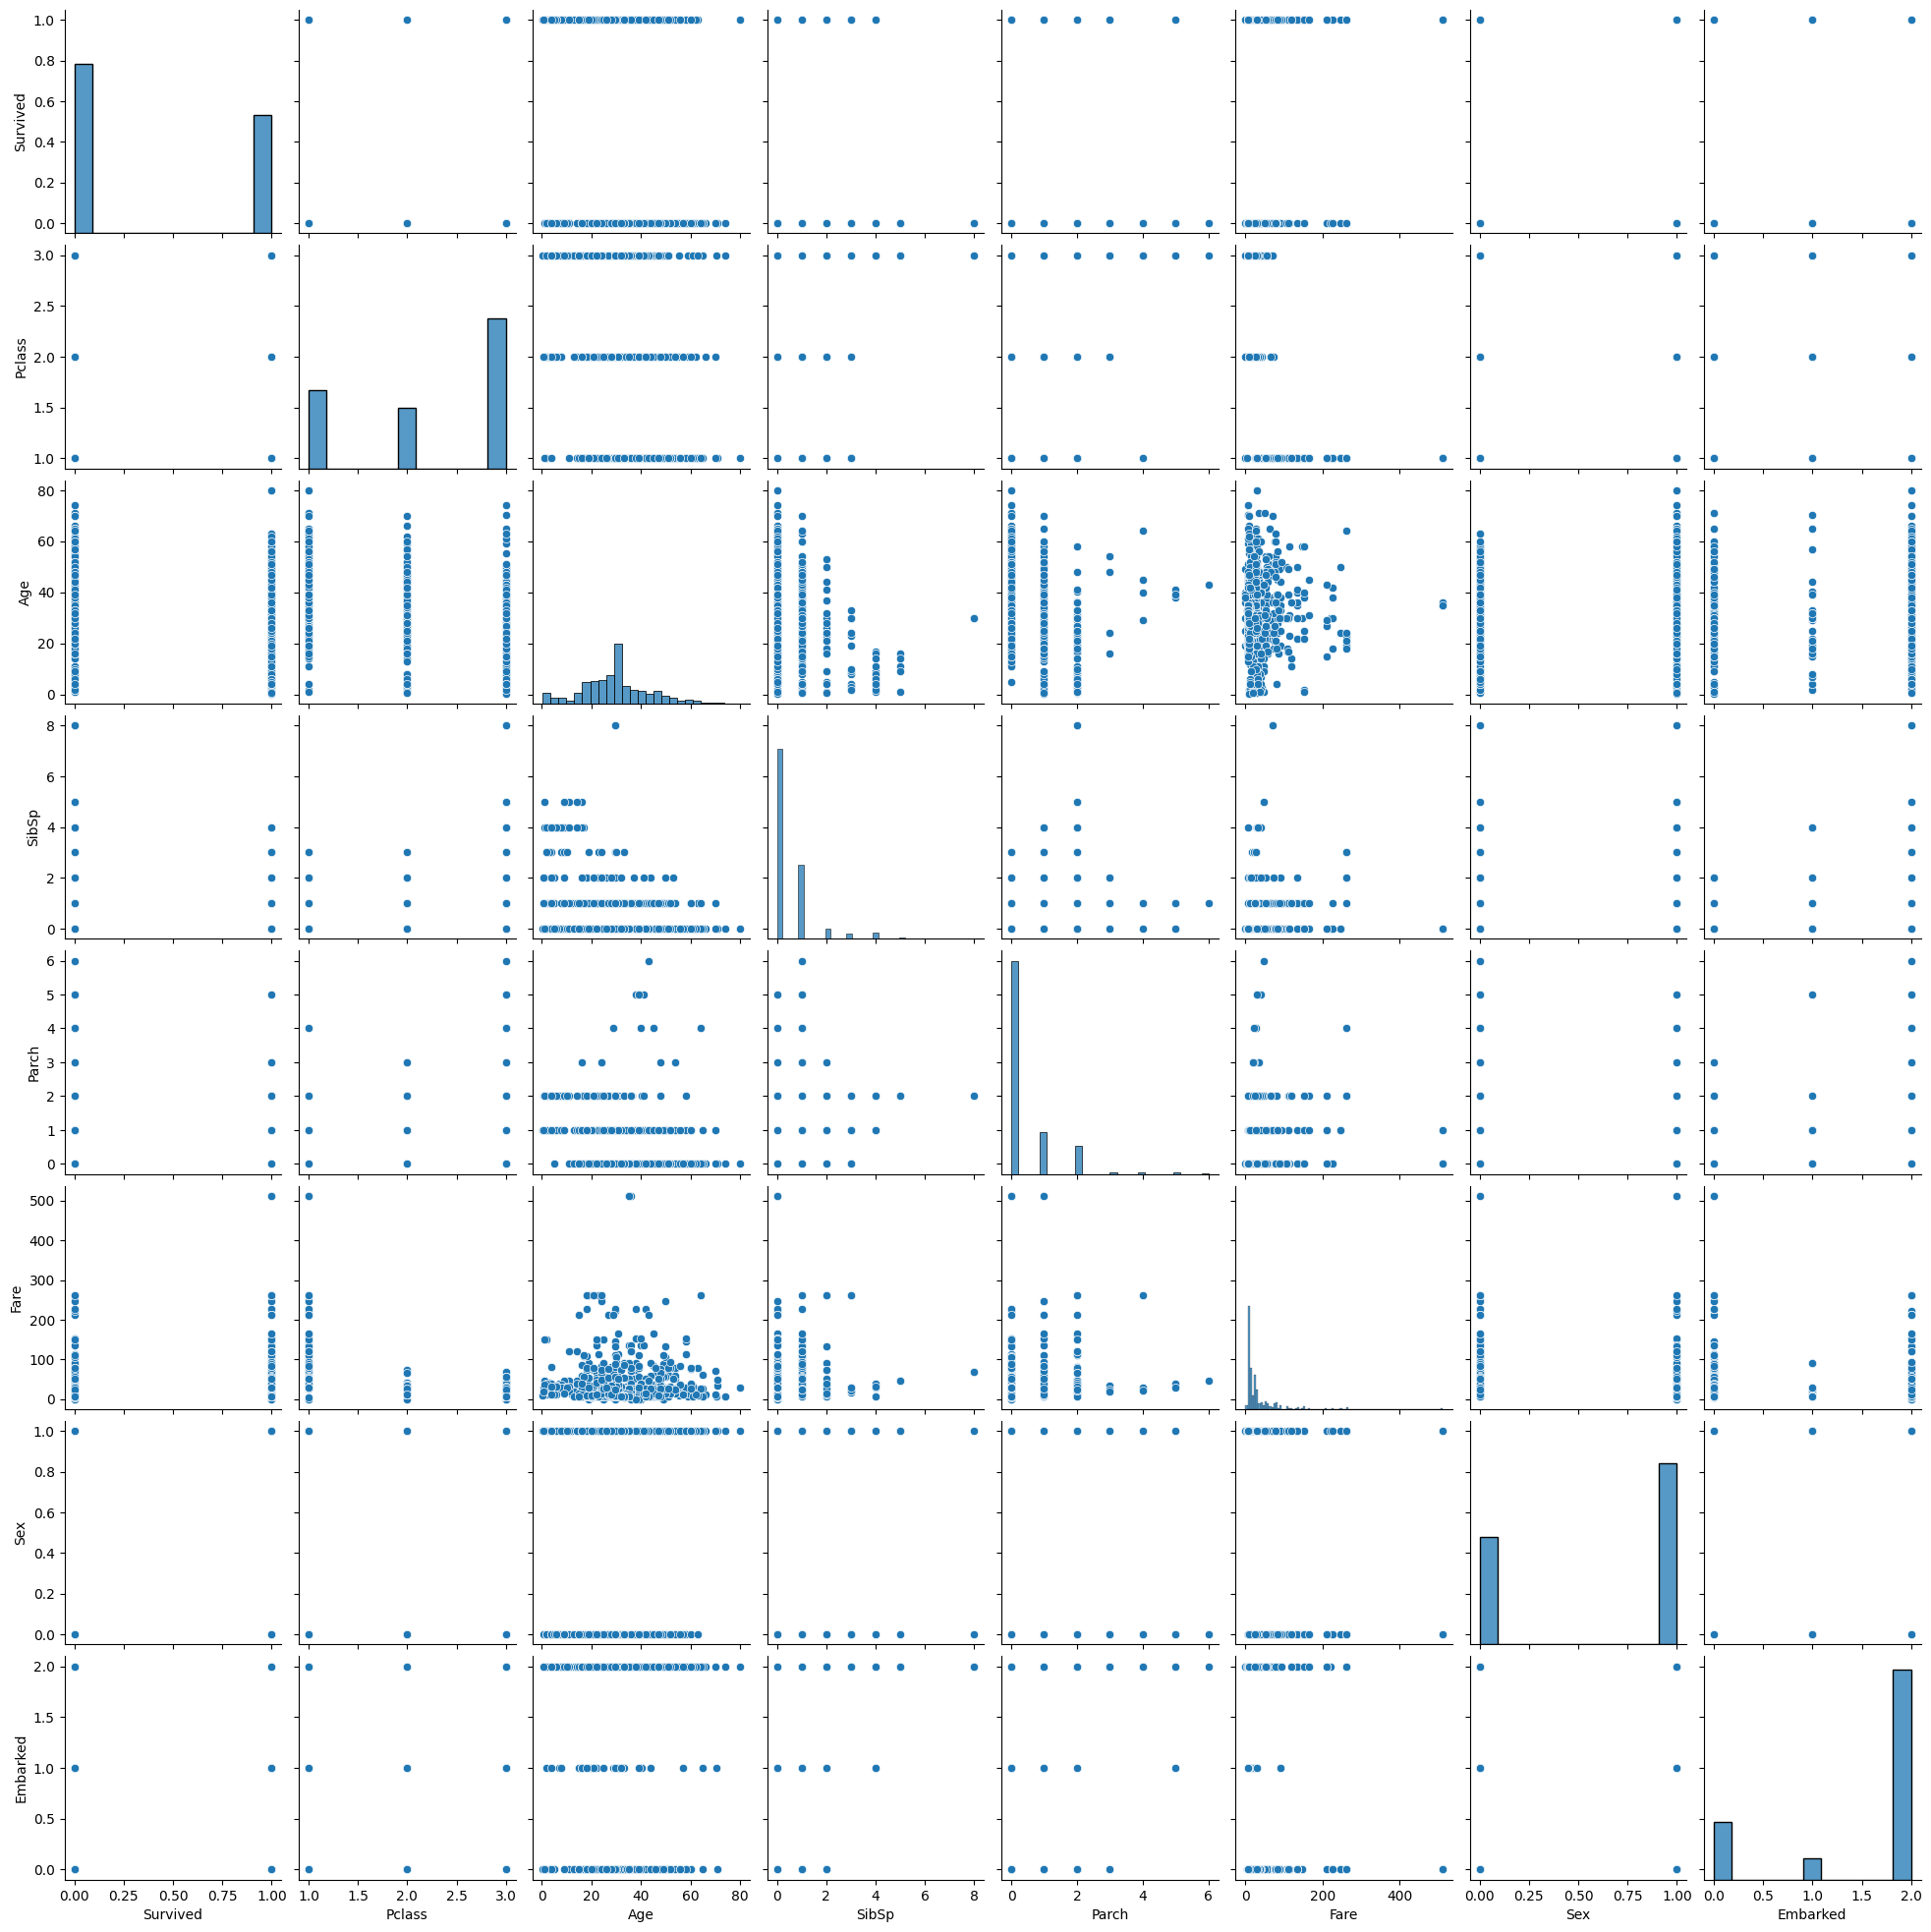

In [148]:
# Create a pair plot using Seaborn
sns.pairplot(df)
# Display the plot
plt.show()

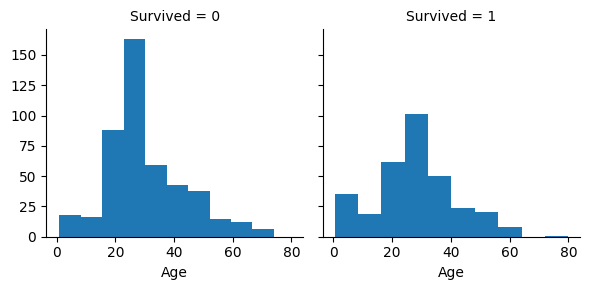

In [149]:
g = sns.FacetGrid(df, col="Survived")
g.map(plt.hist, "Age", bins=10)

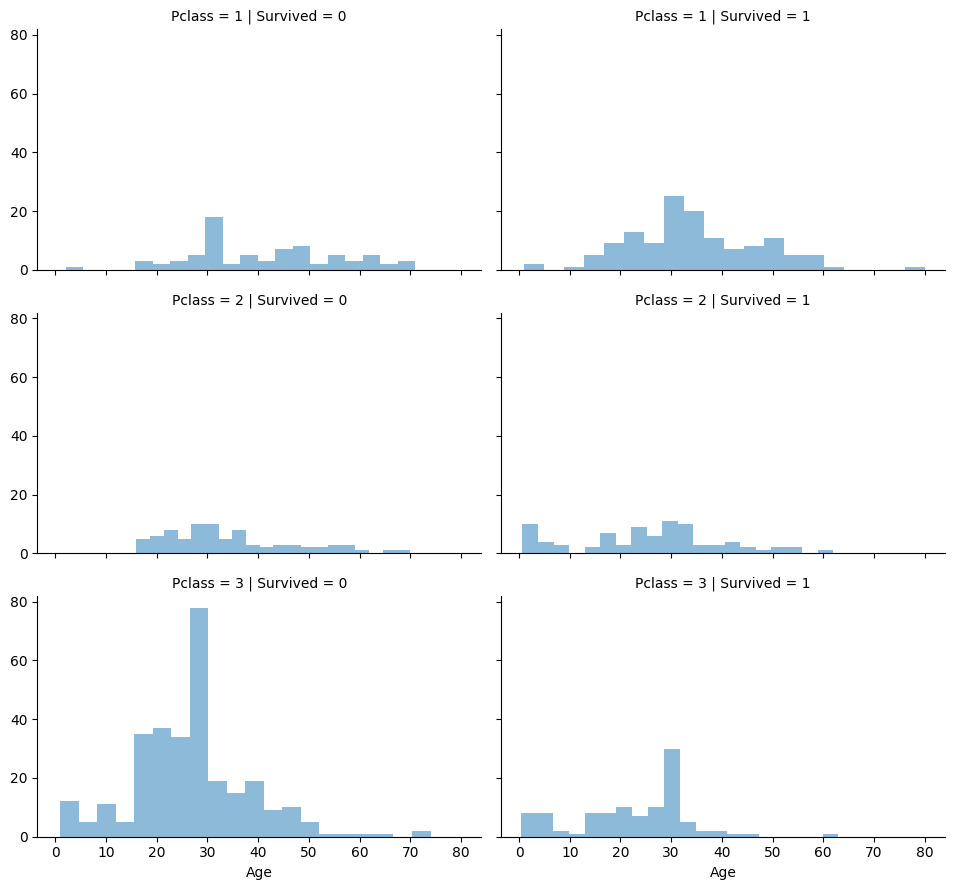

In [154]:
grid = sns.FacetGrid(df, col="Survived", row="Pclass",  aspect=1.6)
grid.map(plt.hist, "Age", alpha=.5, bins=20)
grid.add_legend();

In [156]:
# Drop the "SalePrice" column to get features (X) and keep "SalePrice" as target (y)
x = df.drop(columns="Survived")
y = df["Survived"]

# Split the dataset into training and testing sets
# train_size=.90 means 83% of the data will be used for training
# random_state=42 sets the random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.90, random_state=42)

In [157]:
# Create a dictionary with model names as keys and model instances as values

model_list = {
    "LinearRegression": LogisticRegression(),
    "DecisionTreeRegressor": DecisionTreeClassifier(),
    "RandomForestRegressor": RandomForestClassifier(),
    "MLPRegressor": MLPClassifier(hidden_layer_sizes=[64, 150, 32], max_iter=500)
}

# Iterate through the models and evaluate their performance
for model_name, model_instance in model_list.items():
    # Train the model
    model_instance.fit(X_train, y_train)
    
    # Calculate scores on training and testing data
    score_train = model_instance.score(X_train, y_train)
    score_test = model_instance.score(X_test, y_test)

    # Print the scores
    print("Model {}, Train Score: {:.4f}, Test Score: {:.4f}".format(model_name, score_train, score_test))

Model LinearRegression, Train Score: 0.7814, Test Score: 0.7564
Model DecisionTreeRegressor, Train Score: 0.9857, Test Score: 0.6923
Model RandomForestRegressor, Train Score: 0.9857, Test Score: 0.7692
Model MLPRegressor, Train Score: 0.7743, Test Score: 0.7949
